In [2]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [8]:
## Preparación
##
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import matplotlib as mpl
#alt.renderers.enable('notebook');
%matplotlib inline


In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/indicadores-mundiales.csv",
                 sep = ',',           # separador de campos
                 thousands = None,    # separador de miles para números
                 decimal = '.',       # separador de los decimales para números
                 encoding='latin-1')  # idioma

In [22]:
df = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
df

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,5318.6,10668.7,1013.0
Europa,3780.2,13830.6,2890.5
Las Americas,5375.5,10901.8,1223.1
Oceania,1784.8,3133.1,282.5
Oriente Medio,1754.7,3251.1,194.2
africa,11136.2,14452.7,911.7


Altair opera directamente sobre los campos del DataFrame. Por ello, para construir el gráfico solicitado, se requiere cambiar la forma del DataFrame mediante una operación de stack(), así:

In [24]:
df = pd.DataFrame(df.stack())
df

0
Region                                  
Asia          Poblacion 0-14  0   5318.6
              Poblacion 15-64 0  10668.7
              Poblacion 65+   0   1013.0
Europa        Poblacion 0-14  0   3780.2
              Poblacion 15-64 0  13830.6
              Poblacion 65+   0   2890.5
Las Americas  Poblacion 0-14  0   5375.5
              Poblacion 15-64 0  10901.8
              Poblacion 65+   0   1223.1
Oceania       Poblacion 0-14  0   1784.8
              Poblacion 15-64 0   3133.1
              Poblacion 65+   0    282.5
Oriente Medio Poblacion 0-14  0   1754.7
              Poblacion 15-64 0   3251.1
              Poblacion 65+   0    194.2
africa        Poblacion 0-14  0  11136.2
              Poblacion 15-64 0  14452.7
              Poblacion 65+   0    911.7

In [12]:
## El índice de cada fila es una tupla con el nombre
## de la región y el rango de edad
for p in df.index:
    print(p)

('Asia', 'Poblacion 0-14')
('Asia', 'Poblacion 15-64')
('Asia', 'Poblacion 65+')
('Europa', 'Poblacion 0-14')
('Europa', 'Poblacion 15-64')
('Europa', 'Poblacion 65+')
('Las Americas', 'Poblacion 0-14')
('Las Americas', 'Poblacion 15-64')
('Las Americas', 'Poblacion 65+')
('Oceania', 'Poblacion 0-14')
('Oceania', 'Poblacion 15-64')
('Oceania', 'Poblacion 65+')
('Oriente Medio', 'Poblacion 0-14')
('Oriente Medio', 'Poblacion 15-64')
('Oriente Medio', 'Poblacion 65+')
('africa', 'Poblacion 0-14')
('africa', 'Poblacion 15-64')
('africa', 'Poblacion 65+')


In [25]:
# # Se cambia el nombre de la última columna
df.columns = ["Poblacion"]

# #Se agrega la columna Region y se extrae la región como la primera
# #componente del índice
df["Region"] = [p[0] for p in df.index]

## Se agrega la columna Edad y se extrae como
## La segunda componente del índice
df["Age"] = [p[1] for p in df.index]

In [26]:
df.index = range(len(df))

In [27]:
df

,Poblacion,Region,Age
0,5318.6,Asia,Poblacion 0-14
1,10668.7,Asia,Poblacion 15-64
2,1013.0,Asia,Poblacion 65+
3,3780.2,Europa,Poblacion 0-14
4,13830.6,Europa,Poblacion 15-64
5,2890.5,Europa,Poblacion 65+
6,5375.5,Las Americas,Poblacion 0-14
7,10901.8,Las Americas,Poblacion 15-64
8,1223.1,Las Americas,Poblacion 65+
9,1784.8,Oceania,Poblacion 0-14


## Construcción del gráfico

Se realiza la primera interación para construir el gráfico. La estructura de un gráfico en Altair siempre es la misma. La componente mark_bar() indica el tipo de gráfico. Los campos se indican mediante su nombre, seguido de :, seguido del tipo de dato (N: Nominal, Q: Quantity).

In [29]:
##
## En este primer gráfico, los valores están apilados.
##
alt.Chart(df).mark_bar().encode(
    x = "Region:N",
    y = "Poblacion:Q")

alt.Chart(...)

Text(0, 0.5, 'Poblacion')

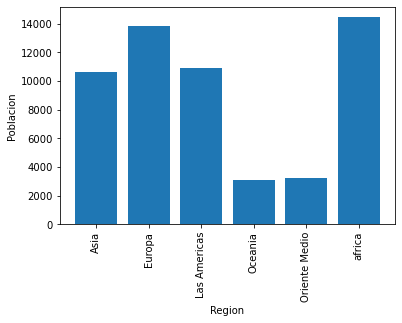

In [44]:
plt.bar(df["Region"], df["Poblacion"])
plt.xticks(rotation = "vertical")
plt.xlabel("Region")
plt.ylabel("Poblacion")

In [48]:
##
## Se cambian los colores para cada rango de edad

alt.Chart(df).mark_bar().encode(
    x = 'Region:N',          # Columna en el eje X
    y = 'Poblacion:Q',       # Columna en el eje Y
    color = 'Age:N'          # Los colores cambian con el
)      

alt.Chart(...)

In [49]:
alt.Chart(df).mark_bar().encode(
    x = "Region:N",
    y = "Poblacion:Q",
    color = "Age:N",
    row = "Age:N")

alt.Chart(...)

In [50]:
## Se procede a cambiar el tamaño del gráfico
## usando 'properties'

alt.Chart(df).mark_bar().encode(
    x = "Region:N",
    y = "Poblacion:Q",
    color = "Age:N",
    row = "Age:N").properties(width = 350, height=200)

alt.Chart(...)

## Gráfico alternativo

In [51]:
alt.Chart(df).mark_bar().encode(
    x = 'Poblacion:Q',
    y = 'Region:N',
    color = 'Age:N',
    column='Age:N'
).properties(width=200, height=200)

alt.Chart(...)